<a href="https://colab.research.google.com/github/syedmahmoodiagents/Basics/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install mglearn --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 29.9 MB/s eta 0:00:00


In [6]:
import numpy as np

In [48]:
import matplotlib.pyplot as plt
import mglearn as mg
from sklearn.datasets import make_moons

In [57]:
X,Y = make_moons(noise=0.15, random_state=21)

In [58]:
X.shape

(100, 2)

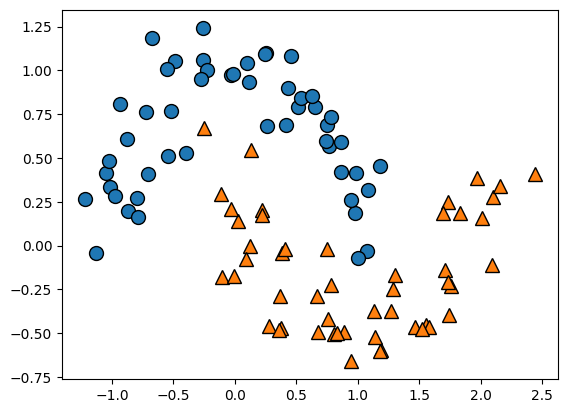

In [59]:
mg.discrete_scatter(X[:, 0], X[:, 1], Y)

In [75]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [76]:
def negative_log_likelihood(y_true, y_pred, eps=1e-15):

    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [107]:
class LogisticRegressionGD:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0.0

        for i in range(1000):
            # Forward pass
            z = np.dot(X, self.w) + self.b
            y_pred = sigmoid(z)

            # Loss
            loss = negative_log_likelihood(y, y_pred)
            self.losses.append(loss)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Parameter update
            self.w -= 0.1 * dw
            self.b -= 0.1 * db

            if i % 100 == 0:
                print(f"Iteration {i:4d} | Loss: {loss:.6f}")

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        probs_positive = sigmoid(z)
        probs_negative = 1 - probs_positive
        return np.vstack([probs_negative, probs_positive]).T

    def predict(self, X):
        probs = self.predict_proba(X)[:, 1] # Get probability of positive class
        return (probs >= 0.5).astype(int)

In [96]:
true_w = np.array([2.0, -3.0])
true_b = 0.5

In [97]:
logits = np.dot(X, true_w) + true_b
probs = sigmoid(logits)

In [98]:
y = (probs >= 0.5).astype(int)

In [99]:
model = LogisticRegressionGD()
model.fit(X, y)

Iteration    0 | Loss: 0.693147
Iteration  100 | Loss: 0.272405
Iteration  200 | Loss: 0.203907
Iteration  300 | Loss: 0.172651
Iteration  400 | Loss: 0.153648
Iteration  500 | Loss: 0.140425
Iteration  600 | Loss: 0.130485
Iteration  700 | Loss: 0.122633
Iteration  800 | Loss: 0.116212
Iteration  900 | Loss: 0.110826


In [100]:

y_pred = model.predict(X)
accuracy = np.mean(y_pred == y)

print("\nFinal accuracy:", accuracy)
print("Learned weights:", model.w)
print("Learned bias:", model.b)



Final accuracy: 0.98
Learned weights: [ 3.1747356  -4.14840331]
Learned bias: 0.4902089773751873
